# Project 2 : Titanic Survival Prediction

In [1]:
import pandas as pd

In [2]:
titanic_data=pd.read_csv("C:/Users/Ayush/Desktop/Afame Tech/DA Project Details/Titanic-Dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_data.isnull().any() #three columns has null values and those are : Age,Cabin,Embarked

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Handling missing values in Age Column

In [8]:
titanic_data['Age'].isna().sum() #177 values

177

In [9]:
titanic_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# Using Predictive imputation for handling the missing values in the Age column

In [10]:
titanic_data['Age'].unique() #Age should not be in float because should int shows definite number and age is defined in definite number always

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Check data types of all columns
print(titanic_data.dtypes)

# Prepare the data: Drop rows with missing age values and convert categorical variables into numerical representations if necessary
# For simplicity, let's drop 'Cabin' and 'Embarked' columns for now
titanic_data_temp = titanic_data.drop(['Cabin', 'Embarked'], axis=1)

# Check for non-numeric values
print(titanic_data_temp.select_dtypes(include=['object']).columns)

# It seems like 'Sex' column contains non-numeric values. Let's encode it.
titanic_data_temp = pd.get_dummies(titanic_data_temp, columns=['Sex'])

# Split the data into features (X) and target variable (y)
X = titanic_data_temp.drop(['Age', 'Name', 'Ticket'], axis=1)
y = titanic_data_temp['Age']

# Split the dataset into training and test sets
X_train, X_test = X[~y.isnull()], X[y.isnull()]
y_train = y[~y.isnull()]

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict missing ages
predicted_ages = model.predict(X_test)

# Impute missing values
titanic_data.loc[titanic_data['Age'].isnull(), 'Age'] = predicted_ages


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Index(['Name', 'Sex', 'Ticket'], dtype='object')


In [12]:
titanic_data['Age'].isna().sum() #clearing missing values

0

In [13]:
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [14]:
titanic_data['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    23
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [15]:
titanic_data.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
554,555,1,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.7750,NaN,S
99,100,0,2,"Kantor, Mr. Sinai",male,34,1,0,244367,26.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,39,0,0,239854,0.0000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,20.2500,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58,0,2,35273,113.2750,D48,C
396,397,0,3,"Olsson, Miss. Elina",female,31,0,0,350407,7.8542,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22,1,0,113776,66.6000,C2,S


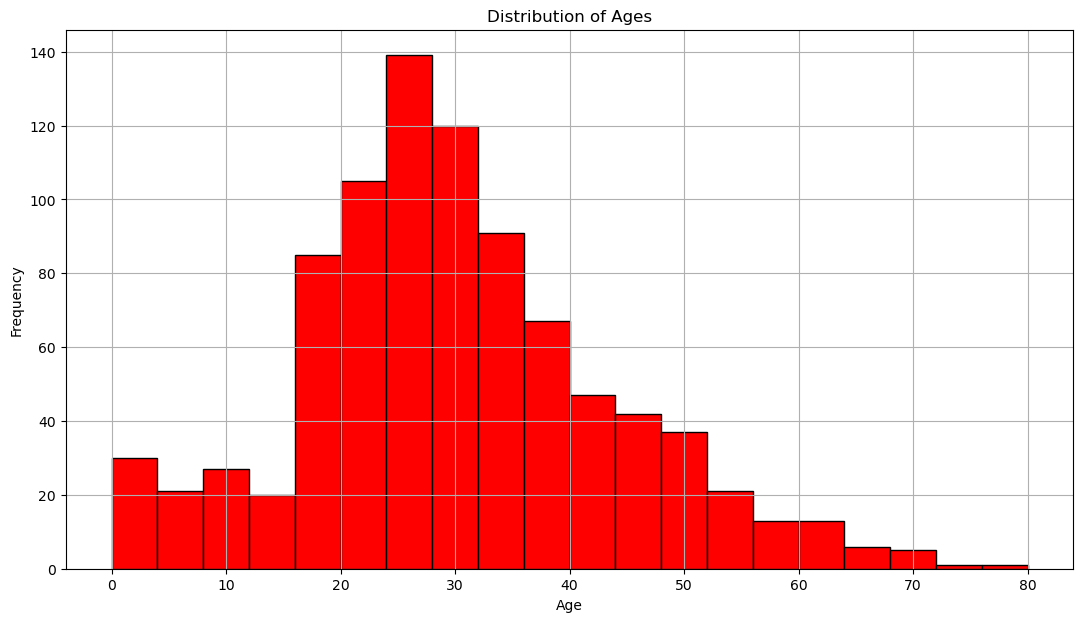

In [16]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(13, 7))
plt.hist(titanic_data['Age'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
titanic_data['Age'].value_counts()

Age
24    45
30    41
25    38
28    35
22    32
      ..
53     2
57     2
66     1
80     1
74     1
Name: count, Length: 71, dtype: int64

Handling missing values in Cabin Column

In [18]:
titanic_data['Cabin'].isna().sum() #687 values

687

In [19]:
titanic_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [20]:
titanic_data['Cabin'].isna().sum()

687

In [21]:
titanic_data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45,0,0,7598,8.050,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17,4,2,3101281,7.925,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50,0,0,W./C. 14258,10.500,NaN,S


In [22]:
titanic_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
titanic_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

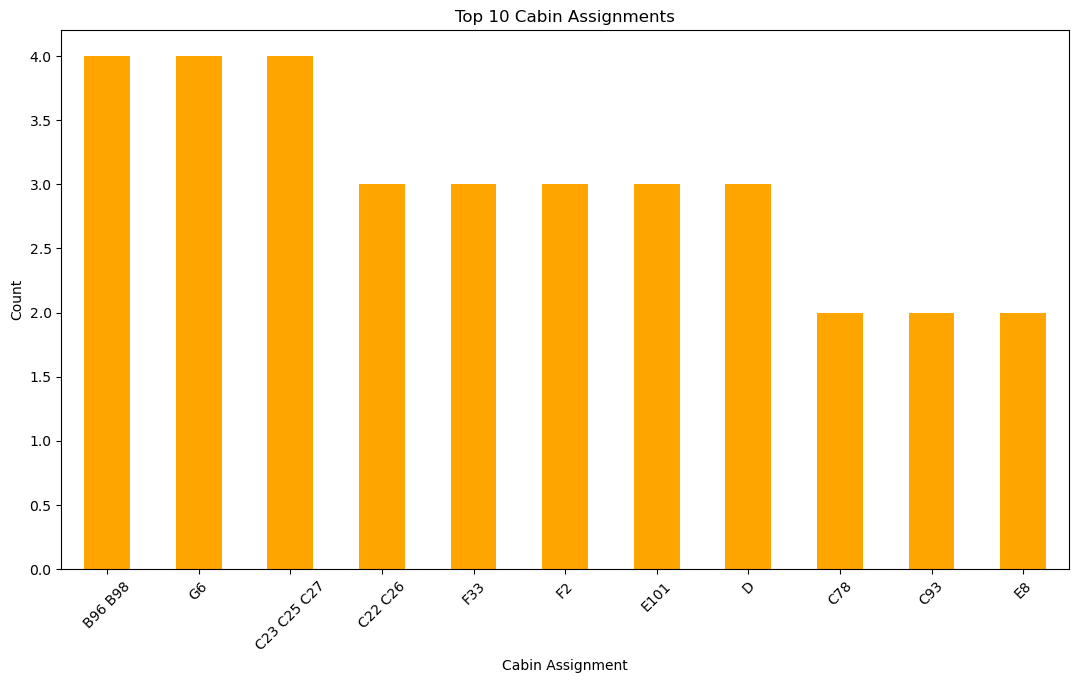

In [76]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each cabin assignment
cabin_value_count = titanic_data['Cabin'].value_counts().head(11)

# Plotting
plt.figure(figsize=(13, 7))
cabin_value_count.plot(kind='bar',color='orange')
plt.xlabel('Cabin Assignment')
plt.ylabel('Count')
plt.title('Top 10 Cabin Assignments')
plt.xticks(rotation=45)
plt.show()

Handling Missing values in Embarked

In [77]:
titanic_data['Embarked'].isna().sum() # 2values

0

In [78]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [79]:
# Filling missing values in 'Embarked' column with the mode
mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(mode_embarked, inplace=True)

In [80]:
titanic_data['Embarked'].isna().sum() #clearing the missing values

0

# Checking the Remaining columns in the dataset

PassengerId Column

In [81]:
titanic_data['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [82]:
titanic_data.shape

(891, 12)

In [83]:
titanic_data['PassengerId'].nunique() #we have exact unique row numbers for each column

891

Survived Column

In [84]:
titanic_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [85]:
titanic_data['Survived'].unique()

array([0, 1], dtype=int64)

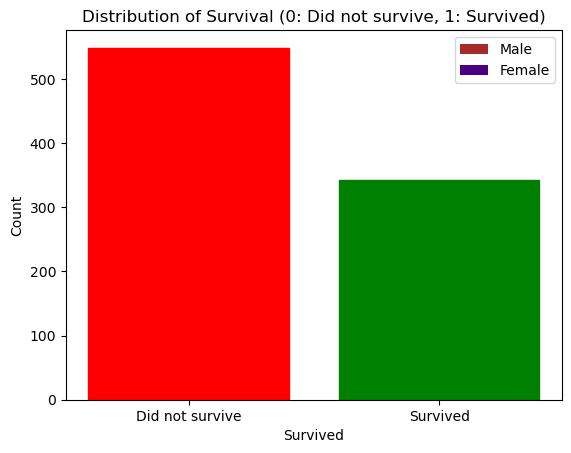

In [86]:
from matplotlib.patches import Patch
survived_distribution = titanic_data['Survived'].value_counts()

# Plotting the distribution
bars= plt.bar(survived_distribution.index, survived_distribution.values)
bars[0].set_color('red')
bars[1].set_color('green')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survival (0: Did not survive, 1: Survived)')
plt.legend(handles=handles)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()

Pclass Column

In [87]:
titanic_data['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [88]:
titanic_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

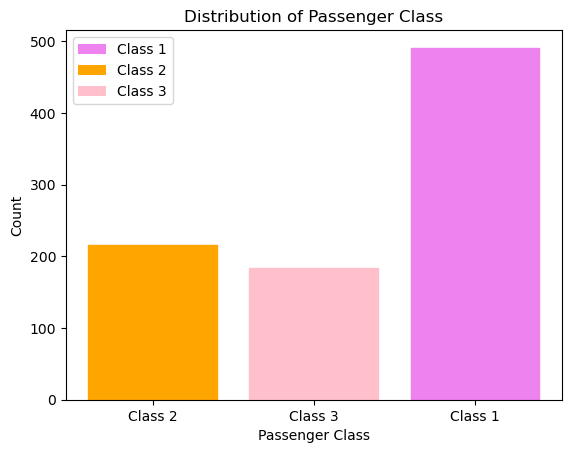

In [89]:
from matplotlib.patches import Patch
# Assuming titanic_data is your DataFrame containing the 'Pclass' column
pclass_distribution = titanic_data['Pclass'].value_counts()

# Plotting the distribution
bars=plt.bar(pclass_distribution.index, pclass_distribution.values)
bars[0].set_color('Violet')
bars[1].set_color('Orange')
bars[2].set_color('Pink')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
handles = [
    Patch(facecolor="Violet", label="Class 1"),
    Patch(facecolor="Orange", label="Class 2"),
    Patch(facecolor="Pink", label="Class 3")
]

plt.legend(handles=handles)
plt.title('Distribution of Passenger Class')
plt.xticks(pclass_distribution.index, ['Class 1', 'Class 2', 'Class 3'])
plt.show()

Name Column

In [90]:
titanic_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [91]:
titanic_data['Name'].nunique()

891

In [92]:
titanic_data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [93]:
titanic_data['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Sex Column

In [94]:
titanic_data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [95]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

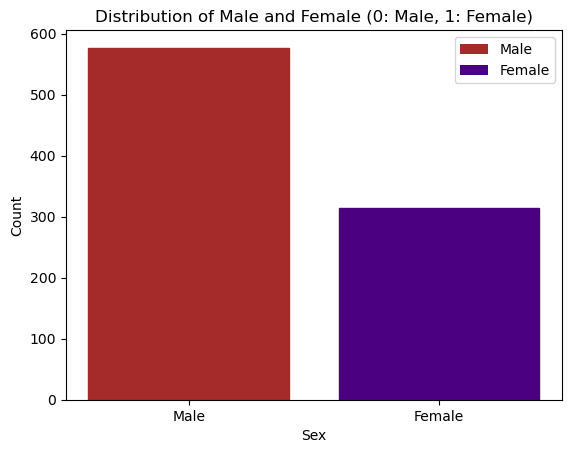

In [96]:
from matplotlib.patches import Patch
sex_distribution = titanic_data['Sex'].value_counts()

# Plotting the distribution
bars=plt.bar(sex_distribution.index, sex_distribution.values)
bars[0].set_color('Brown')
bars[1].set_color('indigo')
plt.xlabel('Sex')
plt.ylabel('Count')
handles = [
    Patch(facecolor="Brown", label="Male"),
    Patch(facecolor="indigo", label="Female")
]

plt.legend(handles=handles)
plt.title('Distribution of Male and Female (0: Male, 1: Female)')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

SibSp Column

In [97]:
titanic_data['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [98]:
titanic_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

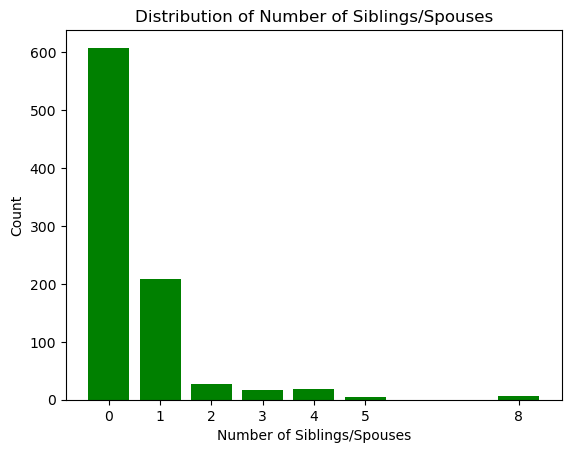

In [99]:
sibsp_distribution = titanic_data['SibSp'].value_counts().sort_index()

# Plotting the distribution
plt.bar(sibsp_distribution.index, sibsp_distribution.values, color='green')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.title('Distribution of Number of Siblings/Spouses')
plt.xticks(sibsp_distribution.index)
plt.show()

Parch Column 

In [101]:
titanic_data['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [102]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

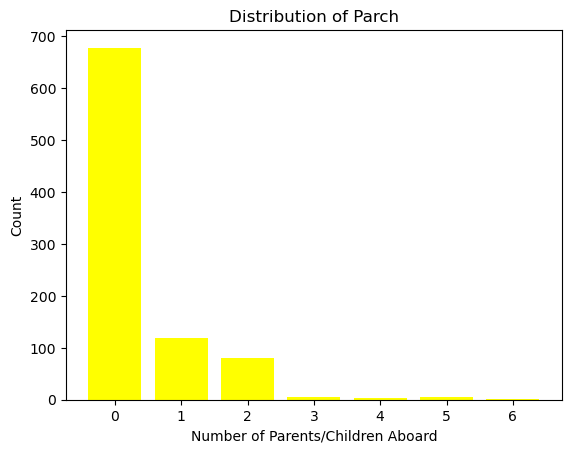

In [103]:
 #Count the occurrences of each unique value in 'Parch'
parch_counts = titanic_data['Parch'].value_counts()

# Create a bar plot
plt.bar(parch_counts.index, parch_counts.values,color='yellow')

# Add labels and title
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.title('Distribution of Parch')

# Show the plot
plt.show()

In [104]:
titanic_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Ticket Column

In [106]:
titanic_data['Ticket'].nunique()

681

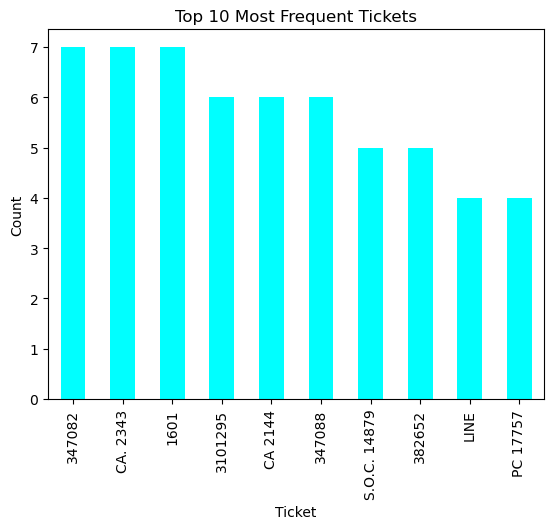

In [115]:
from matplotlib.patches import Patch

# Get the top 10 most frequent ticket values
top_tickets = titanic_data['Ticket'].value_counts().head(10)

# Create a bar plot
top_tickets.plot(kind='bar', color='Cyan')


# Add labels and title
plt.xlabel('Ticket')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Tickets')

# Show the plot
plt.show()

In [116]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Fare Column

In [118]:
titanic_data['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [119]:
titanic_data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

Normalizing fare column for readability

In [120]:
titanic_data['Fare'] = titanic_data['Fare'].apply(lambda x: "${:.2f}".format(x))

# Displaying the formatted 'Fare' column
print(titanic_data['Fare'])

0       $7.25
1      $71.28
2       $7.92
3      $53.10
4       $8.05
        ...  
886    $13.00
887    $30.00
888    $23.45
889    $30.00
890     $7.75
Name: Fare, Length: 891, dtype: object


In [121]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,$71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,$7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,$53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,$13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,$30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23,1,2,W./C. 6607,$23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,$30.00,C148,C


# Data Analysis : Insights from the given dataset

Survival Rate of the Passengers

In [122]:
# Count total number of passengers
total_passengers = len(titanic_data)

# Count number of survivors
survivors = titanic_data['Survived'].sum()

# Calculate survival rate
survival_rate = (survivors / total_passengers) * 100

print("Survival Rate: {:.2f}%".format(survival_rate))


Survival Rate: 38.38%


Survival Rate by age groups

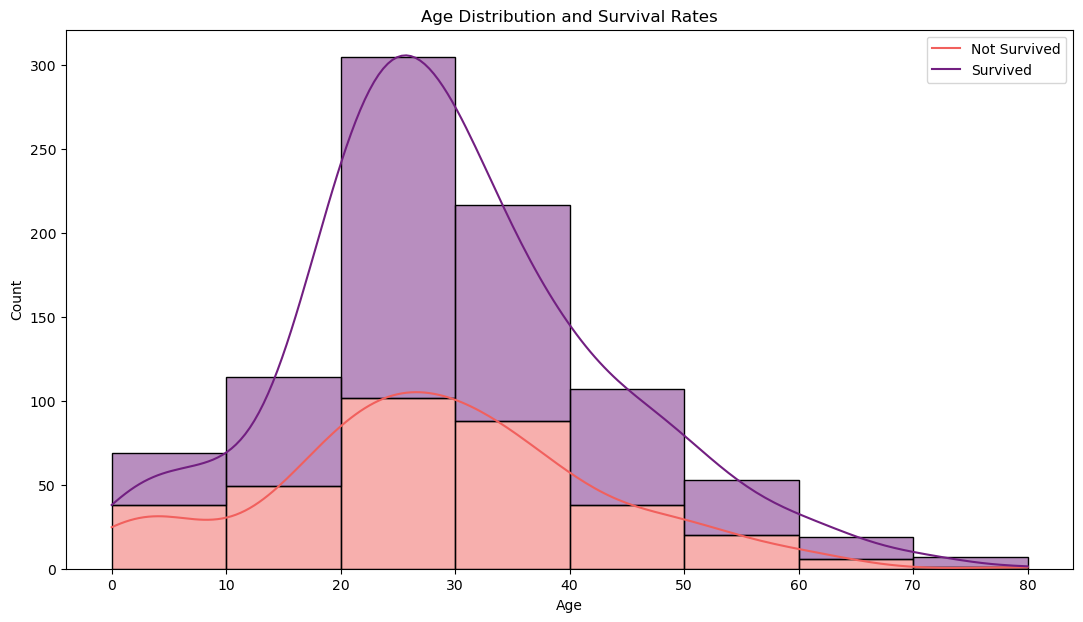

Survival Rate by Age Group:
AgeGroup
0-10     49.253731
11-20    40.625000
21-30    33.639144
31-40    42.187500
41-50    36.274510
51-60    36.956522
61-70    22.222222
71-80    25.000000
Name: Survived, dtype: float64


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Categorize passengers into age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)

# Calculate survival rate for each age group
survival_by_age = titanic_data.groupby('AgeGroup')['Survived'].mean() * 100

# Plot age distribution and survival rates
plt.figure(figsize=(13, 7))
sns.histplot(data=titanic_data, x='Age', bins=age_bins, kde=True, hue='Survived', multiple='stack', palette='magma')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution and Survival Rates')
plt.legend(labels=['Not Survived', 'Survived'], loc='upper right')
plt.show()

# Print survival rate by age group
print("Survival Rate by Age Group:")
print(survival_by_age)


Survival Rate By Gender

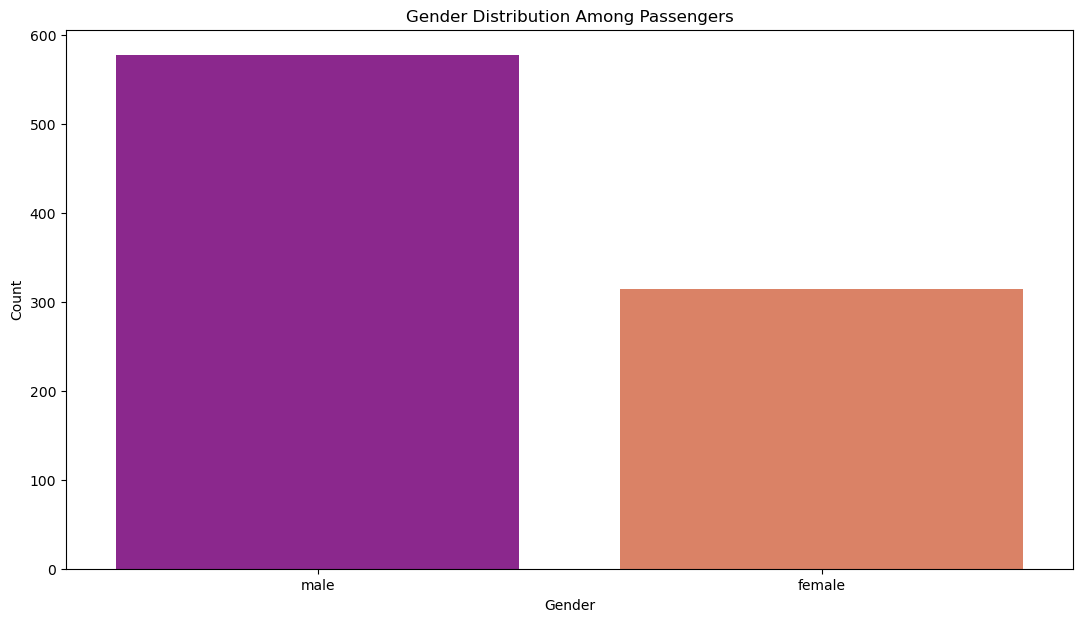

Survival Rate by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze gender distribution
gender_distribution = titanic_data['Sex'].value_counts()

# Calculate survival rate for each gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean() * 100

# Plot gender distribution
plt.figure(figsize=(13, 7))
sns.countplot(data=titanic_data, x='Sex', palette='plasma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution Among Passengers')
plt.show()

# Print survival rate by gender
print("Survival Rate by Gender:")
print(survival_by_gender)


Survival Rate by Passenger Class

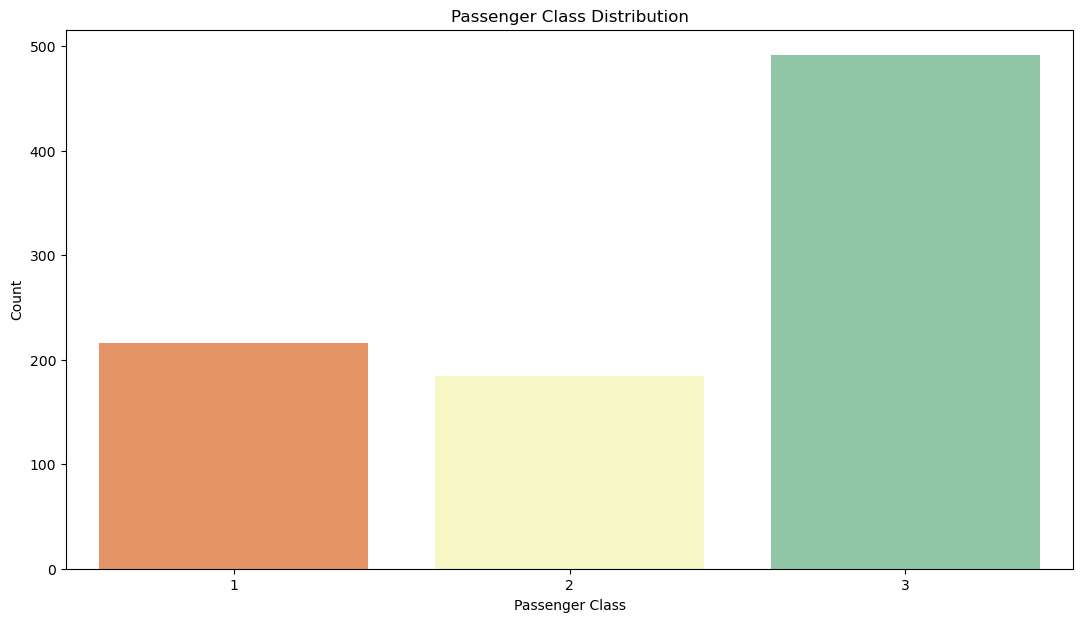

Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze class distribution
class_distribution = titanic_data['Pclass'].value_counts()

# Calculate survival rate for each class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean() * 100

# Plot class distribution
plt.figure(figsize=(13, 7))
sns.countplot(data=titanic_data, x='Pclass', palette='Spectral')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()

# Print survival rate by class
print("Survival Rate by Passenger Class:")
print(survival_by_class)

Family Size Analysis

C:\Users\Ayush\AppData\Local\Temp\ipykernel_11808\1780016386.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


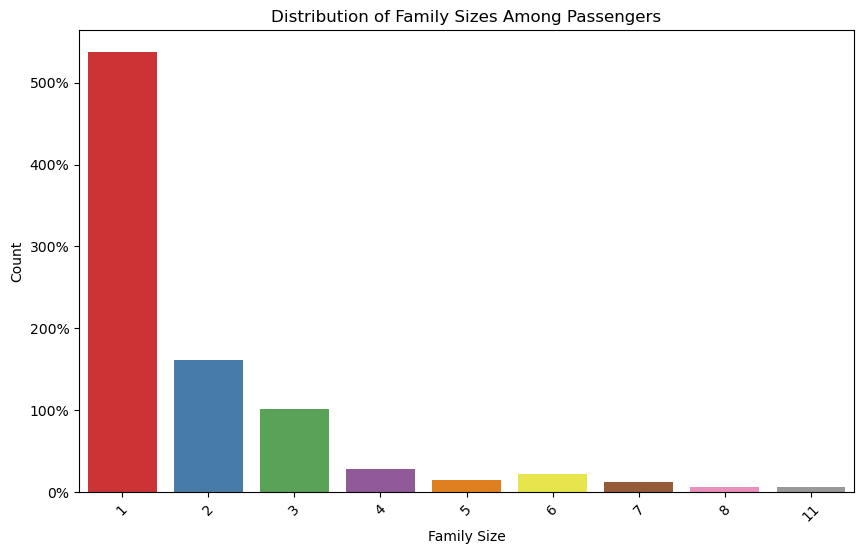

Survival Rate by Family Size:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


In [134]:
# Calculate family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Analyze distribution of family sizes
family_size_distribution = titanic_data['FamilySize'].value_counts().sort_index()

# Calculate survival rate based on family size
survival_by_family_size = titanic_data.groupby('FamilySize')['Survived'].mean() * 100

# Plot distribution of family sizes
plt.figure(figsize=(10, 6))
sns.barplot(x=family_size_distribution.index, y=family_size_distribution.values, palette='Set1')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Distribution of Family Sizes Among Passengers')
plt.xticks(rotation=45)

# Change y-axis labels to percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

plt.show()

# Print survival rate by family size
print("Survival Rate by Family Size:")
print(survival_by_family_size)

High survival Rate Cabins

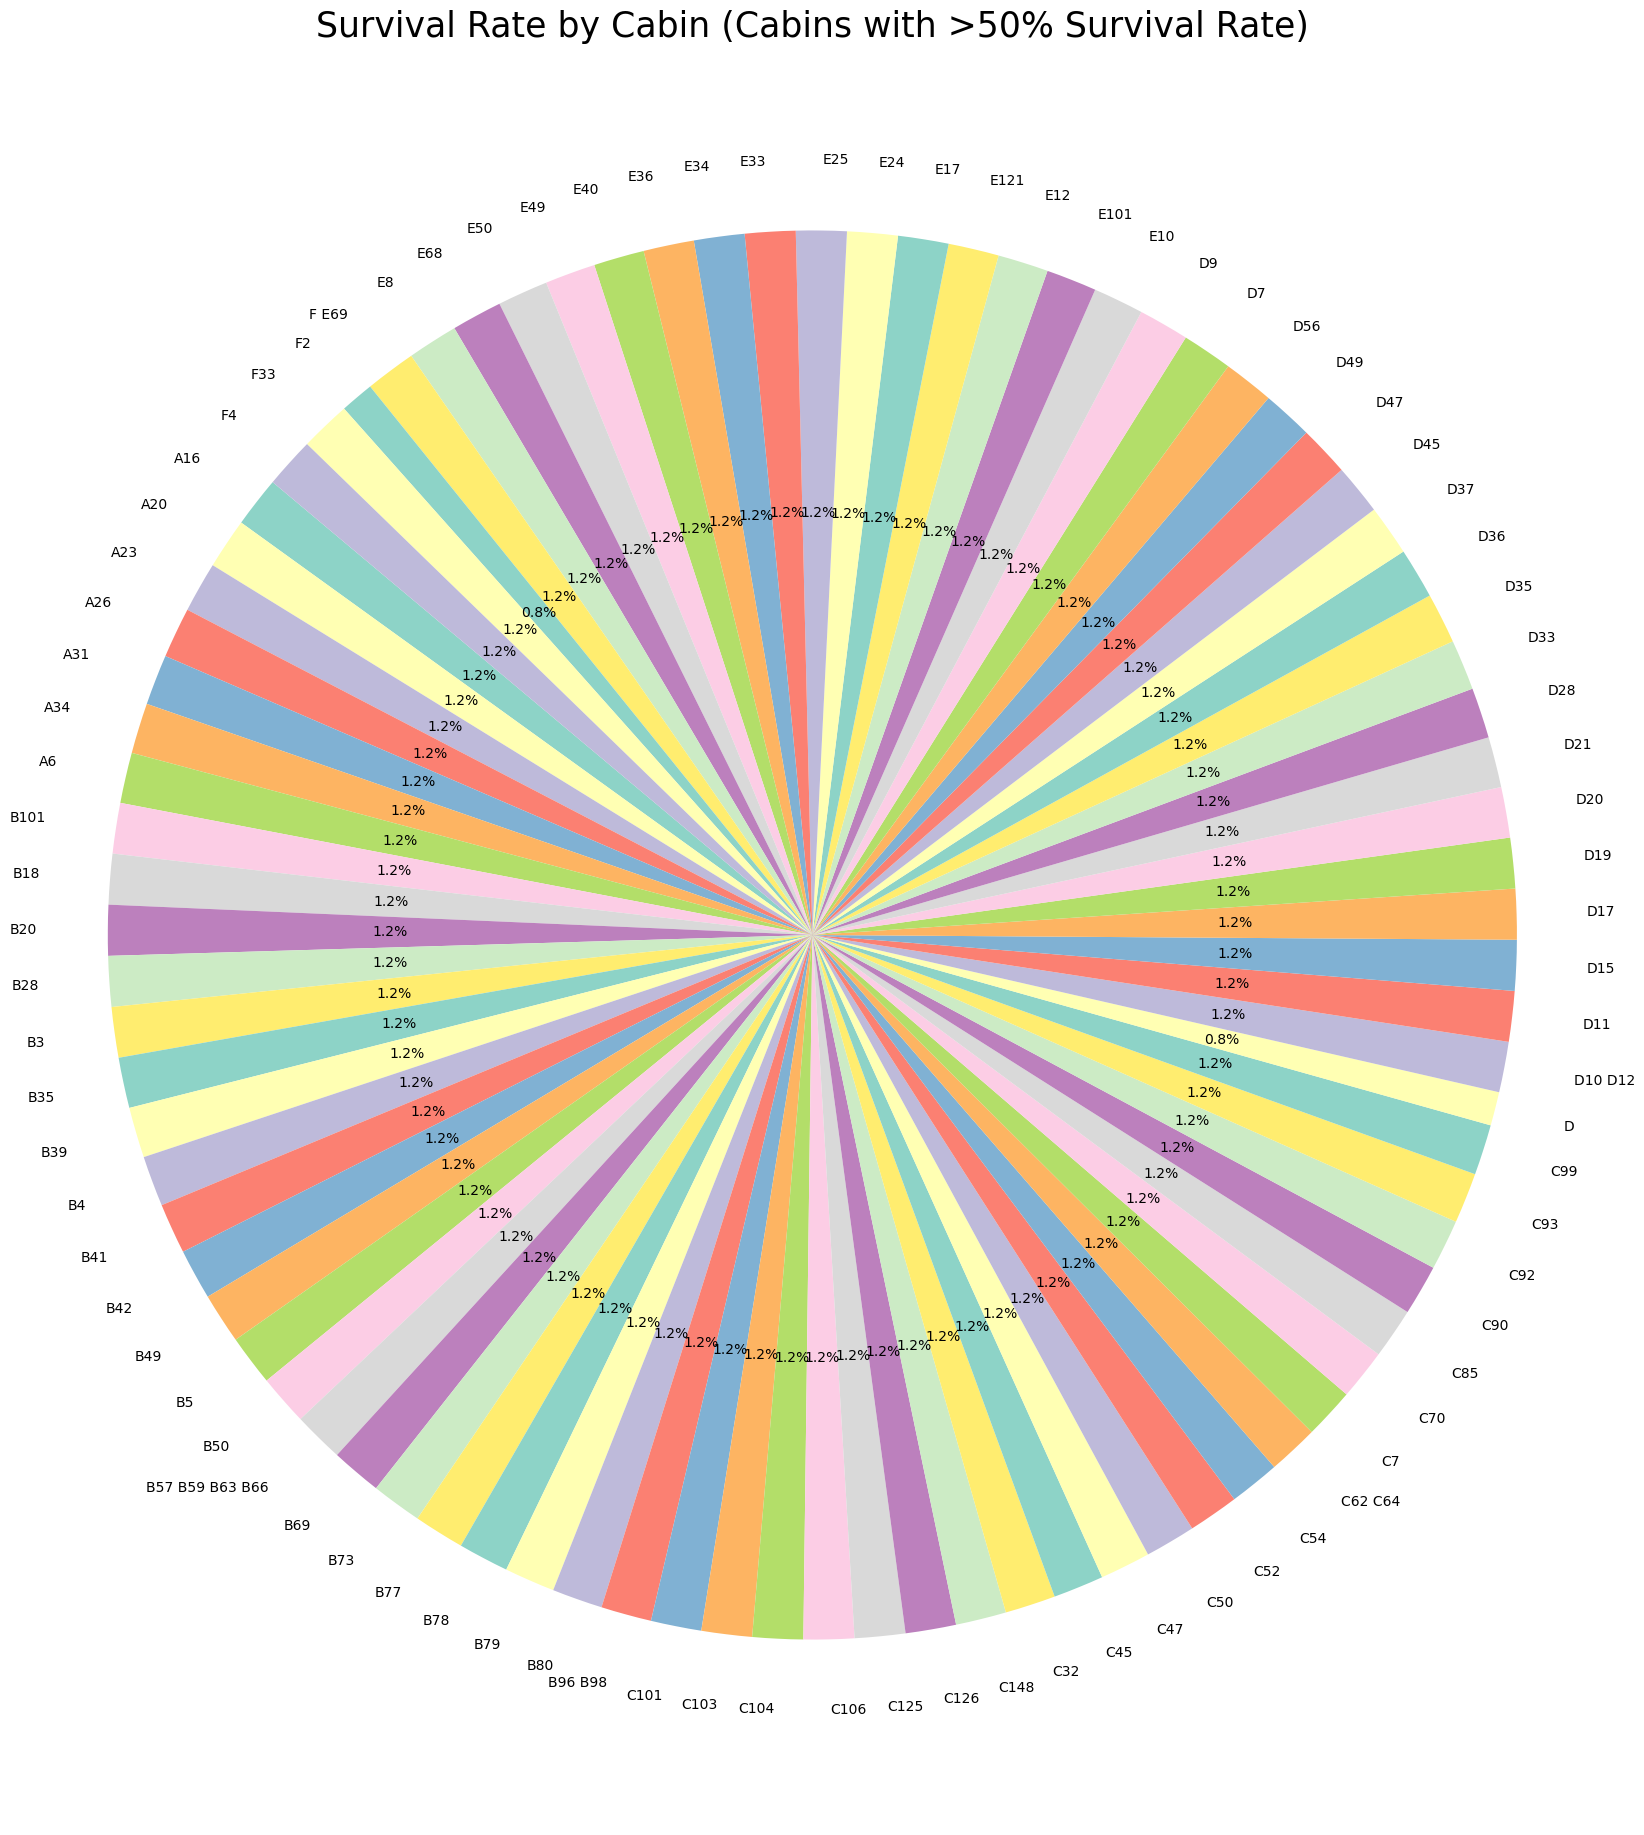

In [165]:
cabin_survival_rate = titanic_data.groupby('Cabin')['Survived'].mean() * 100

# Filter out cabins with survival rates less than a certain threshold (e.g., 50%)
high_survival_cabins = cabin_survival_rate[cabin_survival_rate > 50]

# Plot the survival rate for selected cabins in a pie chart
plt.figure(figsize=(20, 20))
plt.pie(high_survival_cabins, labels=high_survival_cabins.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(high_survival_cabins)))
plt.title('Survival Rate by Cabin (Cabins with >50% Survival Rate)', fontsize=25)
plt.subplots_adjust(top=1.0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Embarkation Port Analysis

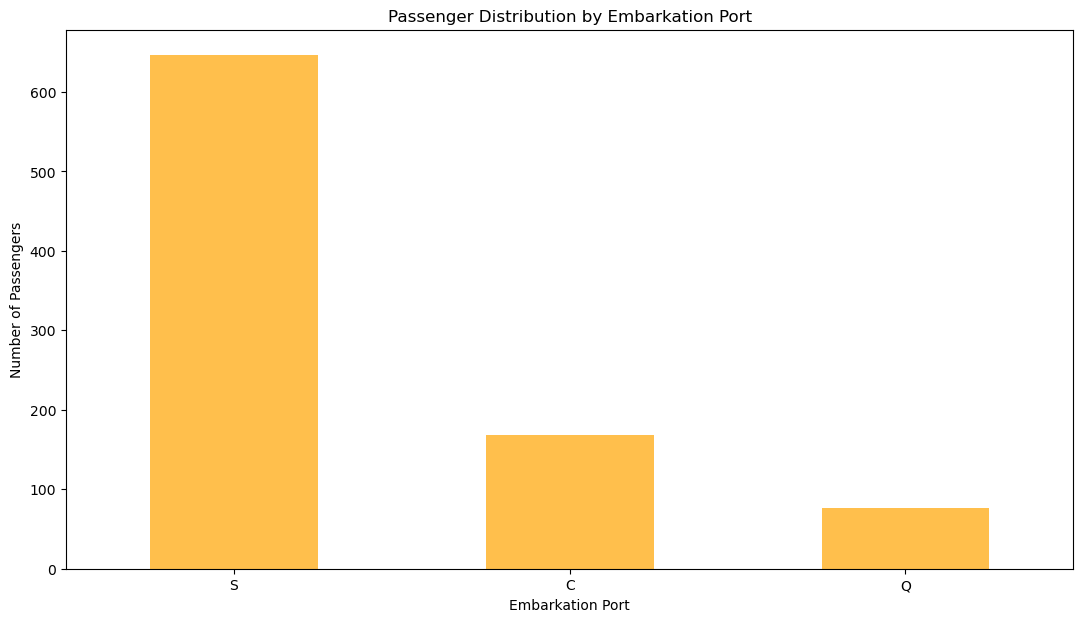

In [167]:
# Count passengers embarked at each port
embarkation_counts = titanic_data['Embarked'].value_counts()

# Plot
plt.figure(figsize=(13, 7))
embarkation_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Passenger Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

Name Analysis

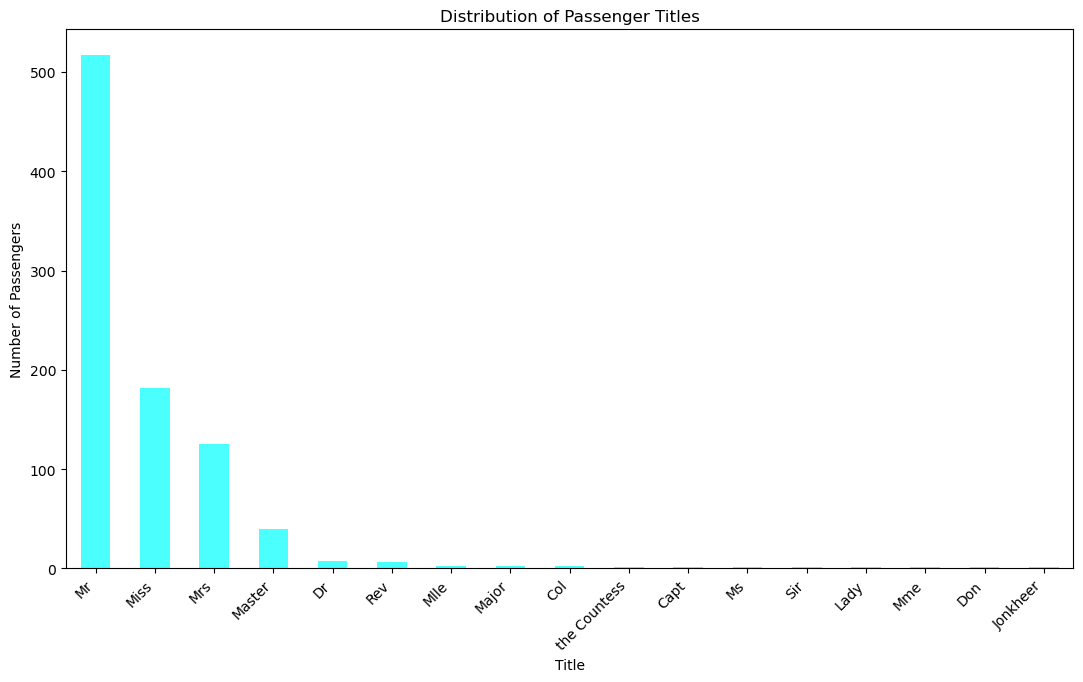

In [168]:
# Extract titles from names
titanic_data['Title'] = titanic_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Count occurrences of each title
title_counts = titanic_data['Title'].value_counts()

# Plot
plt.figure(figsize=(13, 7))
title_counts.plot(kind='bar', color='cyan', alpha=0.7)
plt.title('Distribution of Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45, ha='right')
plt.show()